In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import axes3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
!pip install mlxtend==0.17.3
from mlxtend.feature_selection import SequentialFeatureSelector


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
# Loading the dataset for marketing campaigns
df = pd.read_excel('marketing.xlsx')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [3]:
# Assessing data dimensions
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Assessing first few rows of the data to check for distribution
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Checking dor duplicates
df.duplicated().sum()

0

In [6]:
# Checking for unrepresentative values in the dataset
nan_values = df.isna().any()

# Print columns with NaN values
print(nan_values)

# Checking for missing values
missing_count = df.isnull().sum()

# Print missing values count
print(missing_count)

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome          

In [7]:
# Assessing descriptive statistics in a table format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
#df = df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'])

In [9]:
# Bifurcating into categorical and numerical variables
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Education', 'Marital_Status', 'Dt_Customer']
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [10]:
# Checking for "?" in the Categoricals variables
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Education : 0
Marital_Status : 0
Dt_Customer : 0


In [11]:
# Checking for "?" in the Numerical variables
for variable in num:
    print(variable,":", sum(df[variable] == '?'))

ID : 0
Year_Birth : 0
Income : 0
Kidhome : 0
Teenhome : 0
Recency : 0
MntWines : 0
MntFruits : 0
MntMeatProducts : 0
MntFishProducts : 0
MntSweetProducts : 0
MntGoldProds : 0
NumDealsPurchases : 0
NumWebPurchases : 0
NumCatalogPurchases : 0
NumStorePurchases : 0
NumWebVisitsMonth : 0
AcceptedCmp3 : 0
AcceptedCmp4 : 0
AcceptedCmp5 : 0
AcceptedCmp1 : 0
AcceptedCmp2 : 0
Complain : 0
Z_CostContact : 0
Z_Revenue : 0
Response : 0


In [12]:
# Since Income has 24 NAN rows, will impute column with Median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Assessing for missing values
print(df['Income'].isna().sum())

0


In [13]:
# Assessing counts of Education type
df['Education'].value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
# Clubbbing 2nd Cycle into Masters
df['Education'] = df["Education"].replace('2n Cycle', "Master")

In [15]:
# Assessing count for target variables " Response"
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [16]:
# Assessing counts of each status type
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
# Renaming "Together" to Common Law
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Common_Law')

In [18]:
# Pairing YOLO, Alone, Absurd with "Single"
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

In [19]:
# Sorting
df['Dt_Customer'].value_counts().index.sort_values(ascending=True)

Index(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03',
       '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08',
       ...
       '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29'],
      dtype='object', length=663)

In [20]:
# Converting to Y-M-D format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%Y-%m-%d")
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [21]:
# dopping the feature 'Dt_Customer' as it is not essential for our analysis
df.drop('Dt_Customer', axis=1, inplace=True)

In [22]:
# Calculating " Age" of customer
df['Age'] = 2023 - df["Year_Birth"]

In [23]:
# Calculating Total Offers Accepted by summing Accepted CMP
df['Accepted_Offers'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [24]:
# Calculating Total Spends over the period
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [25]:
# Calculating Teens columns by summing Kid home and Teen Home
df['Teens'] = df['Kidhome'] + df['Teenhome']

<Axes: >

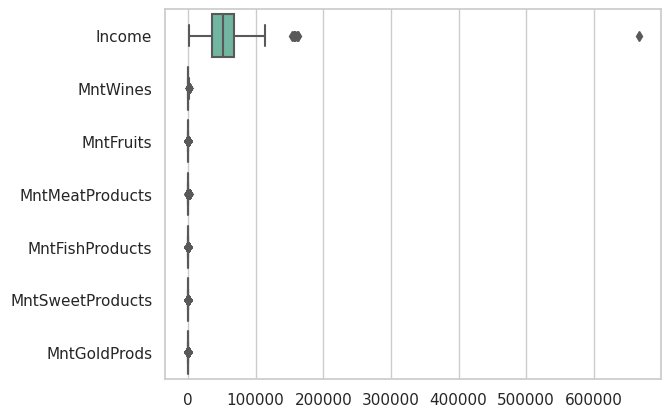

In [26]:
# Subsetting expenditure columns from the dataset
cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_subset = df[cols]
sns.set(style='whitegrid')
sns.boxplot(data=df_subset, orient='h', palette='Set2')

In [27]:
# Treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
# Ensuring that any values exceeding the upper or lower range are replaced with the respective range limits.
lower_range,upper_range=remove_outlier(df['Income'])
df['Income']=np.where(df['Income']>upper_range,upper_range,df['Income'])
df['Income']=np.where(df['Income']<lower_range,lower_range,df['Income'])

In [29]:
lower_range,upper_range=remove_outlier(df['MntFruits'])
df['MntFruits']=np.where(df['MntFruits']>upper_range,upper_range,df['MntFruits'])
df['MntFruits']=np.where(df['MntFruits']<lower_range,lower_range,df['MntFruits'])

In [30]:
lower_range,upper_range=remove_outlier(df['MntWines'])
df['MntWines']=np.where(df['MntWines']>upper_range,upper_range,df['MntWines'])
df['MntWines']=np.where(df['MntWines']<lower_range,lower_range,df['MntWines'])

In [31]:
lower_range,upper_range=remove_outlier(df['MntFishProducts'])
df['MntFishProducts']=np.where(df['MntFishProducts']>upper_range,upper_range,df['MntFishProducts'])
df['MntFishProducts']=np.where(df['MntFishProducts']<lower_range,lower_range,df['MntFishProducts'])

In [32]:
lower_range,upper_range=remove_outlier(df['MntSweetProducts'])
df['MntSweetProducts']=np.where(df['MntSweetProducts']>upper_range,upper_range,df['MntSweetProducts'])
df['MntSweetProducts']=np.where(df['MntSweetProducts']<lower_range,lower_range,df['MntSweetProducts'])

In [33]:
lower_range,upper_range=remove_outlier(df['MntMeatProducts'])
df['MntMeatProducts']=np.where(df['MntMeatProducts']>upper_range,upper_range,df['MntMeatProducts'])
df['MntMeatProducts']=np.where(df['MntMeatProducts']<lower_range,lower_range,df['MntMeatProducts'])

In [34]:
lower_range,upper_range=remove_outlier(df['MntGoldProds'])
df['MntGoldProds']=np.where(df['MntGoldProds']>upper_range,upper_range,df['MntGoldProds'])
df['MntGoldProds']=np.where(df['MntGoldProds']<lower_range,lower_range,df['MntGoldProds'])

<Axes: >

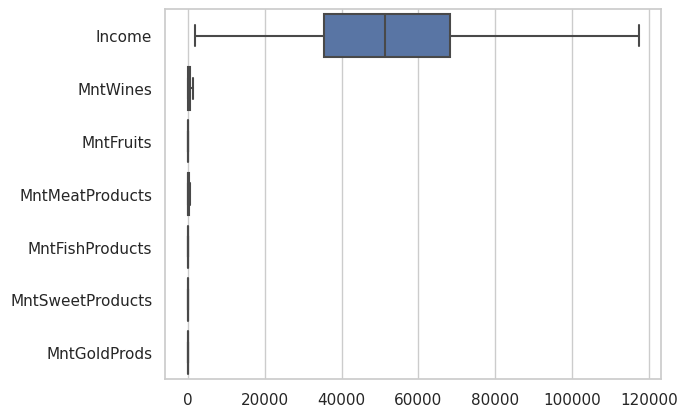

In [35]:
# subset the relevant columns from the dataframe
cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_subset = df[cols]

# create a grid of boxplots
sns.set(style='whitegrid')
sns.boxplot(data=df_subset, orient='h')

Response Distribution:
0    0.850893
1    0.149107
Name: Response, dtype: float64


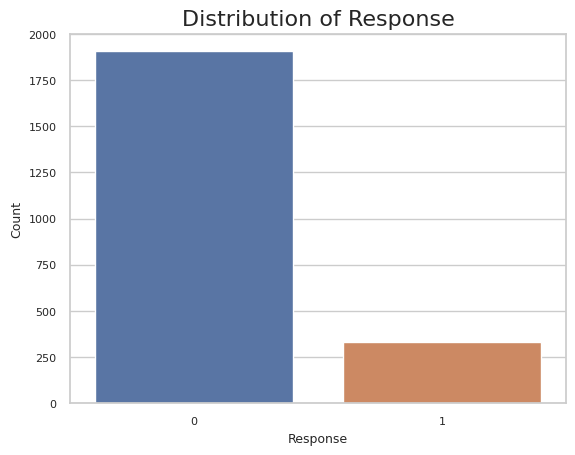

In [36]:
# Visualize the distribution of the Response variable
sns.countplot(x="Response", data=df)

# Calculate the percentage of each class
response = df["Response"].value_counts() / len(df)

# Print the percentage of each class
print("Response Distribution:")
print(response)

# Plot customization
plt.title("Distribution of Response", fontsize=16)
plt.xlabel("Response", fontsize=9)
plt.ylabel("Count", fontsize=9)

# Customize the tick label sizes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()

Text(0.5, 1.0, 'Marital Status Distribution')

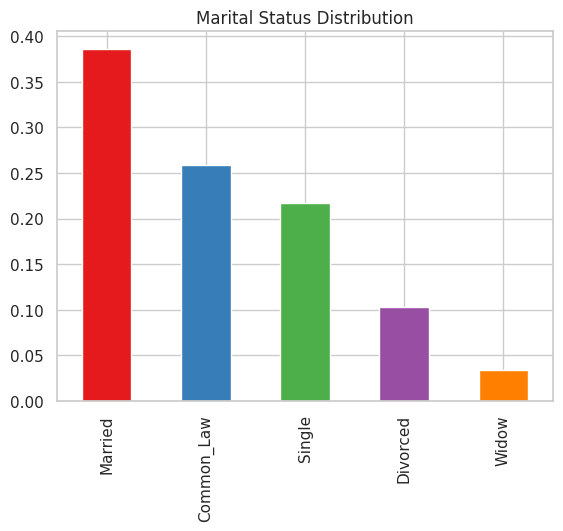

In [37]:
# Evaluating Marital_Status Distribution

colors = sns.color_palette('Set1')

df['Marital_Status'].value_counts(normalize=True).plot.bar(color=colors)
plt.title('Marital Status Distribution')

Text(0.5, 1.0, 'Education Distribution')

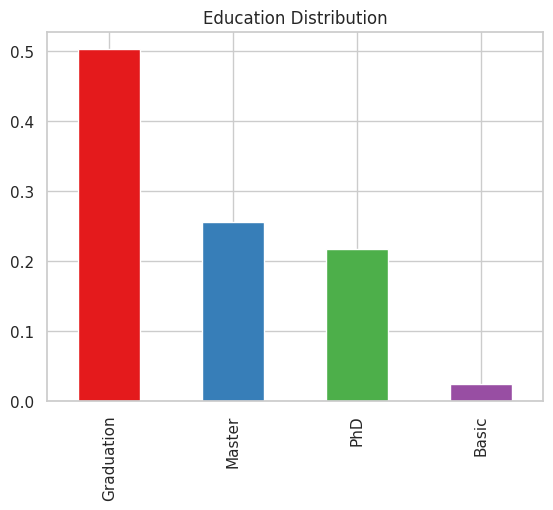

In [38]:
# Evaluting Education column distribution
colors = sns.color_palette('Set1')

# Plot the bar chart with the color palette
df['Education'].value_counts(normalize=True).plot.bar(color=colors)
plt.title('Education Distribution')


Text(0.5, 1.0, 'Income Distribution')

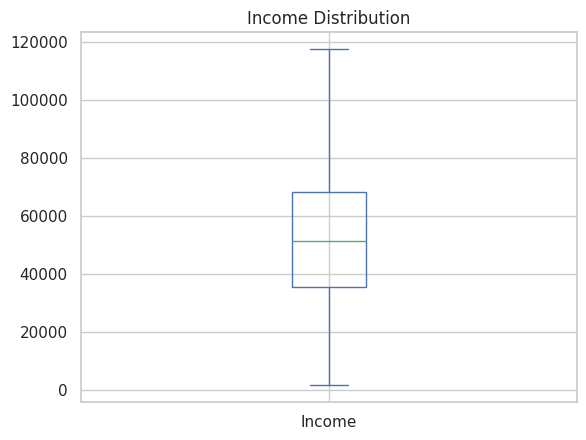

In [39]:
# Evaluting Income Distribution
df['Income'].plot.box()
plt.title('Income Distribution')

Text(0.5, 1.0, 'Recent purchase')

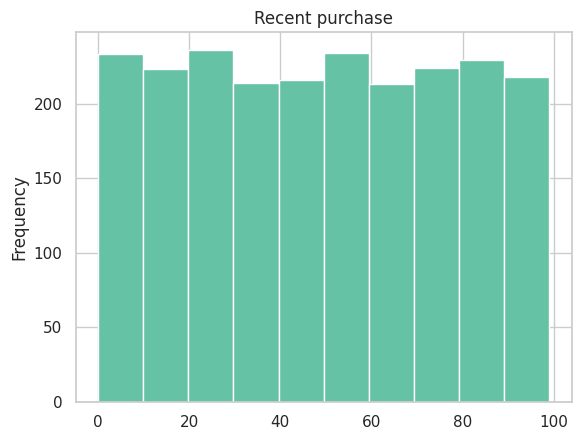

In [40]:
# Evaluting Recency (target variable) distribution
colors = sns.color_palette('Set2')

# Plot the histogram with the color palette
df['Recency'].plot.hist(color=colors)
plt.title('Recent purchase')

Text(0.5, 1.0, 'Spending Pattern across Products')

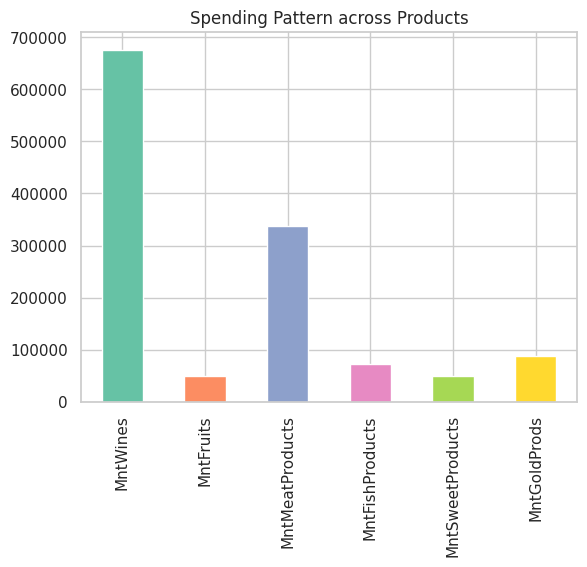

In [41]:
# Assessing spends on dfferent products
colors = sns.color_palette('Set2')

# Plot the bar chart with the color palette
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot.bar(color=colors)
plt.title('Spending Pattern across Products')

Text(0.5, 1.0, 'Purchases by Source')

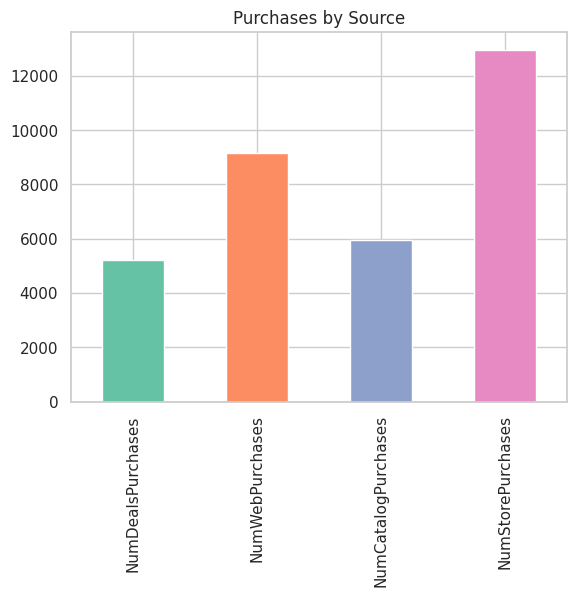

In [42]:
# Assessing Purchasing distribution by Channel / Source
colors = sns.color_palette('Set2')

df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().plot.bar(color=colors)
plt.title('Purchases by Source')

Text(0.5, 1.0, 'Income Distribution by Marital Status')

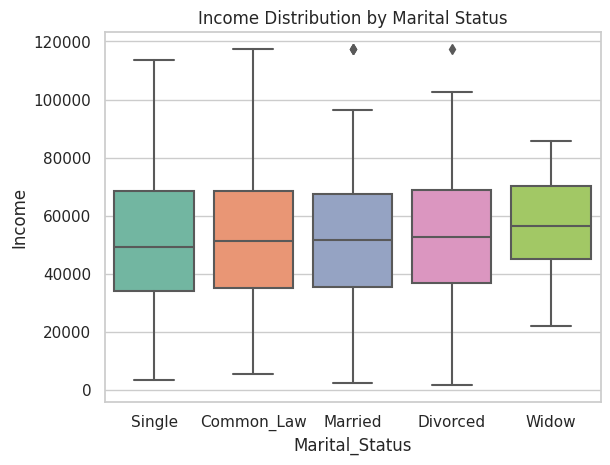

In [43]:
# Boxplot of Income by Marital_Status
palette = sns.color_palette('Set2')
sns.boxplot(x='Marital_Status', y='Income', data=df, palette=palette)
plt.title('Income Distribution by Marital Status')

Text(0.5, 1.0, 'Income Distribution by Education')

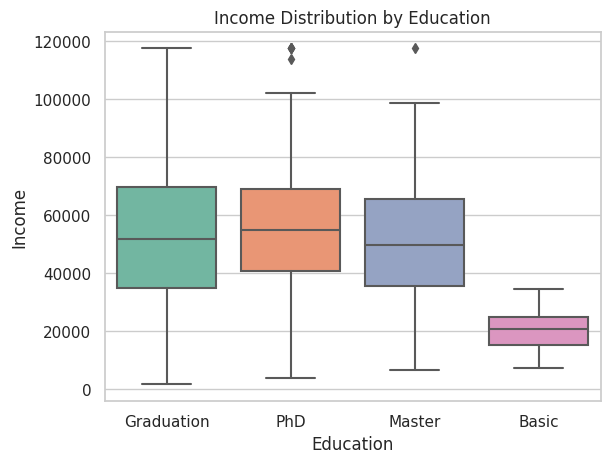

In [44]:
# Boxplot of Income by Education
palette = sns.color_palette('Set2')

# Plot the box plot with the color palette
sns.boxplot(x='Education', y='Income', data=df, palette=palette)
plt.title('Income Distribution by Education')

Text(0.5, 1.0, 'Response Rate by Marital Status')

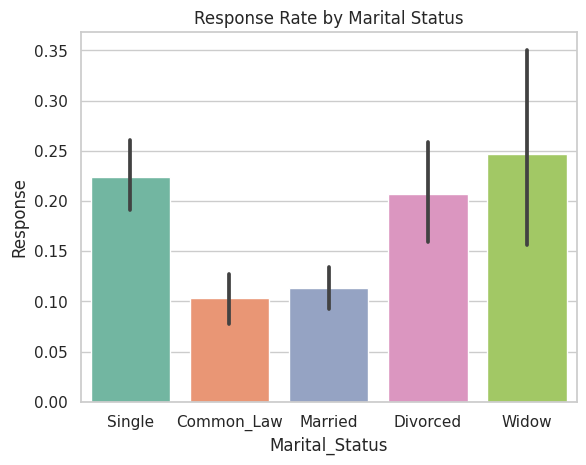

In [45]:
# Barplot of Response by Marital_Status
palette = sns.color_palette('Set2')
sns.barplot(x='Marital_Status', y='Response', data=df, palette=palette)
plt.title('Response Rate by Marital Status')

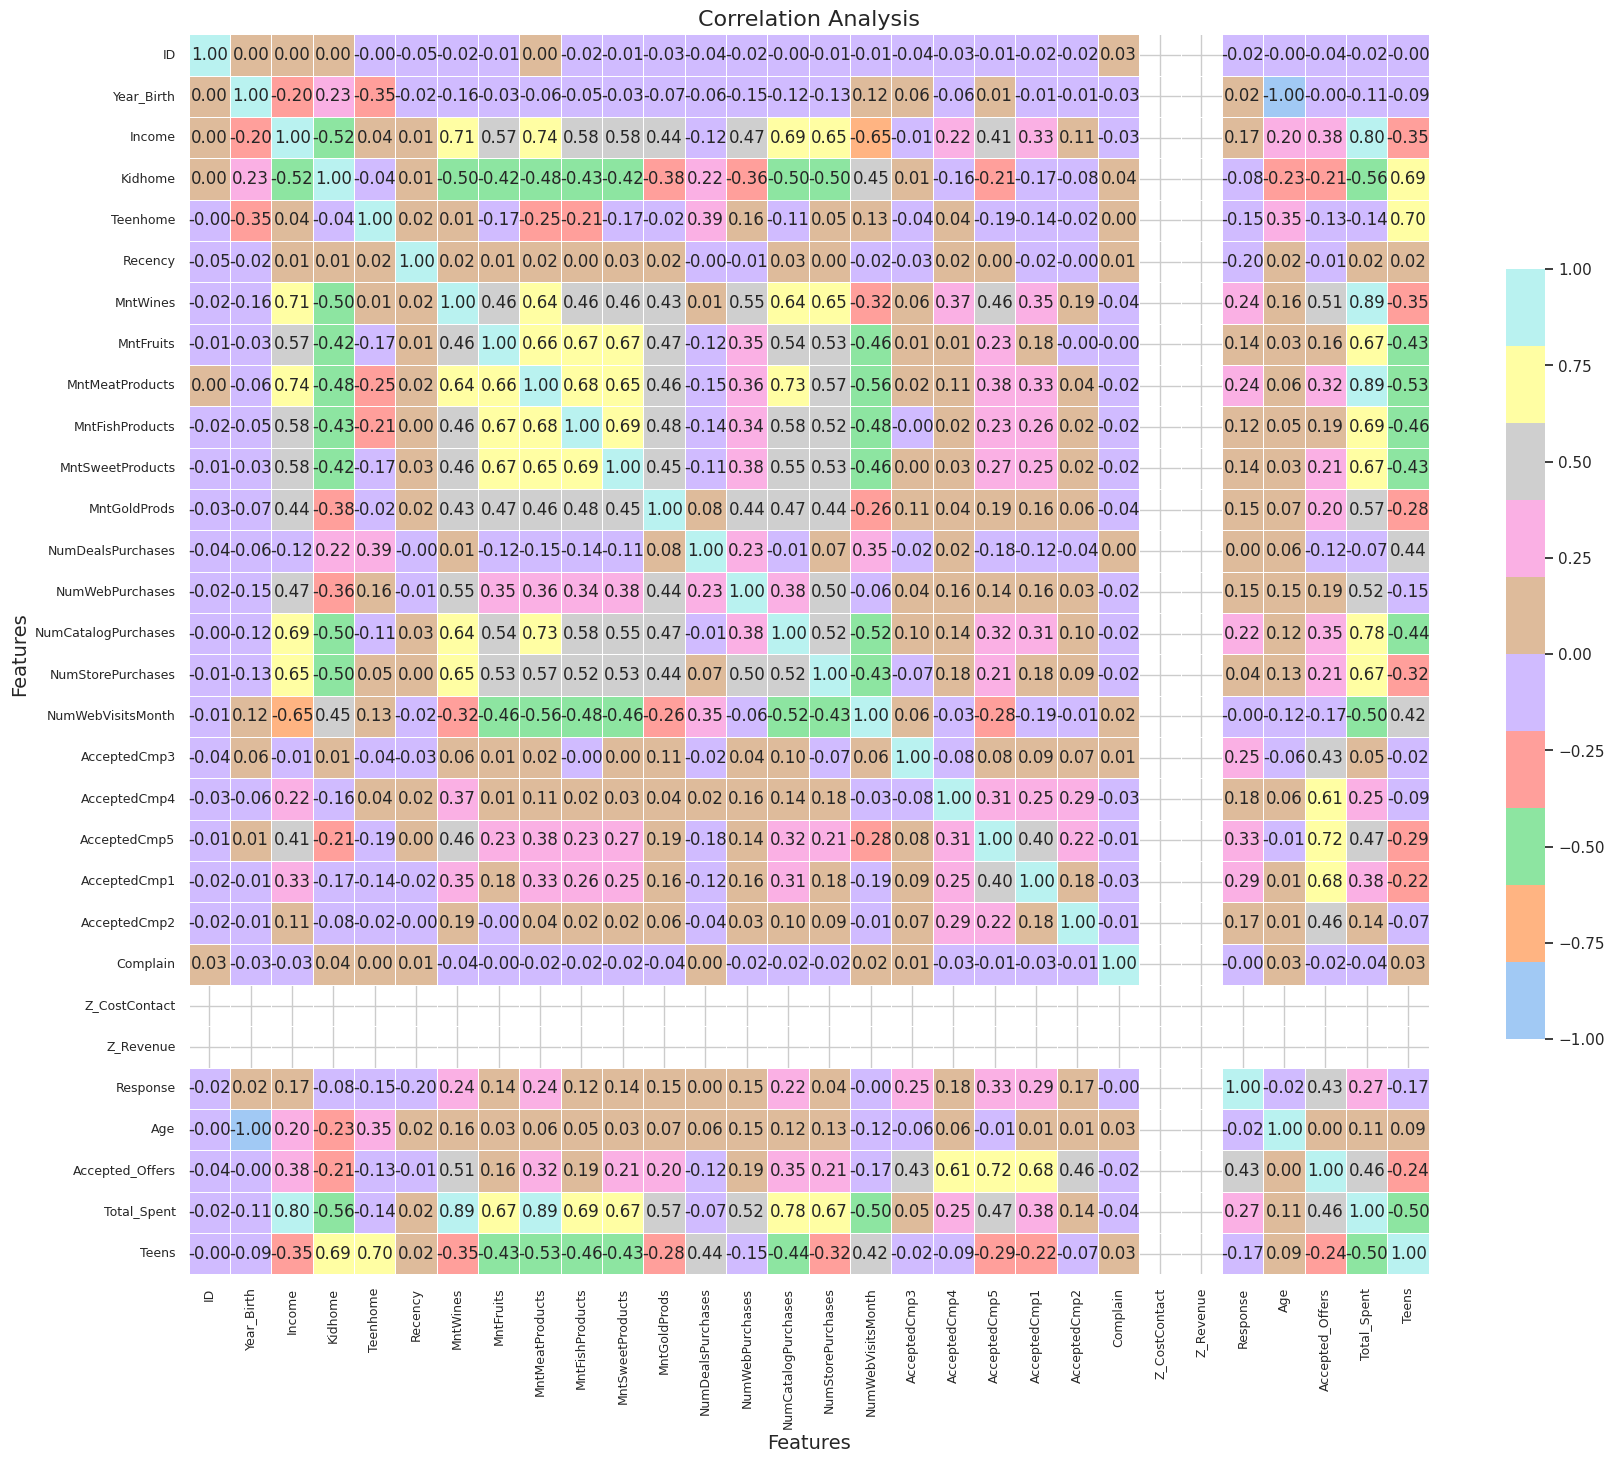

In [46]:
# Correlation Analysis
plt.figure(figsize=(20, 20), dpi=100)
cmap = sns.color_palette("pastel")

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and axis labels
plt.title("Correlation Analysis", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Set the tick label sizes
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Display the plot
plt.show()

**Calculating VIF**</br>
VIF (Variance Inflation Factor) is a measure used to assess multicollinearity in regression analysis. It quantifies the degree to which the variance of the estimated regression coefficients is inflated due to multicollinearity.

In [47]:
# Dummy Encoding Process
df = pd.get_dummies(df, columns=["Marital_Status"])
df = pd.get_dummies(df, columns=["Education"])

In [48]:
# Separate the predictor variables (X) and the target variable (y)
y=df[['Response']]
x=df.drop(['Response'],axis=1)

In [49]:
# Add a constant column to the predictor variables (required for statsmodels)
X = sm.add_constant(x)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]

# Print the VIF values
print(vif)

                     Variable       VIF
0                          ID  0.011742
1                  Year_Birth  1.000000
2                      Income  0.793336
3                     Kidhome  1.000000
4                    Teenhome  1.000000
5                     Recency  0.013191
6                    MntWines  0.955335
7                   MntFruits  0.632272
8             MntMeatProducts  0.926482
9             MntFishProducts  0.670200
10           MntSweetProducts  0.625154
11               MntGoldProds  0.513140
12          NumDealsPurchases  0.414221
13            NumWebPurchases  0.494057
14        NumCatalogPurchases  0.675116
15          NumStorePurchases  0.616109
16          NumWebVisitsMonth  0.619409
17               AcceptedCmp3  1.000000
18               AcceptedCmp4  1.000000
19               AcceptedCmp5  1.000000
20               AcceptedCmp1  1.000000
21               AcceptedCmp2  1.000000
22                   Complain  0.011722
23              Z_CostContact      -inf


All the variables have VIF factor of less than 5

**Model Building**

In [50]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

# fit the logistic regression model
logr_model = sm.Logit(y_train, sm.add_constant(X_train))
logr_fit = logr_model.fit()

# print the summary of the logistic regression results
print(logr_fit.summary())

         Current function value: 0.269000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1568
Model:                          Logit   Df Residuals:                     1536
Method:                           MLE   Df Model:                           31
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                  0.3633
Time:                        20:05:28   Log-Likelihood:                -421.79
converged:                      False   LL-Null:                       -662.46
Covariance Type:            nonrobust   LLR p-value:                 3.246e-82
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ID                         7.936e-06    2.8e-05      0.284      0.777   -4.69e-05    6.28e-05
Year_Birth          

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
# Get the p-values for each variable from the logistic regression summary
p_values = logr_fit.pvalues

# Filter variables based on p-values less than 0.05
significant_vars = p_values[p_values < 0.05]

# Print the significant variables
print("Significant Variables (p < 0.05):")
for var in significant_vars.index:
    print(var)

Significant Variables (p < 0.05):
Recency
MntMeatProducts
MntGoldProds
NumDealsPurchases
NumStorePurchases
NumWebVisitsMonth


In [51]:
# Filter based on the p-values
significant_variables = logr_fit.summary2().tables[1][logr_fit.pvalues < 0.05]

# print Significant variables
print(significant_variables)

                      Coef.  Std.Err.         z         P>|z|    [0.025  \
Recency           -0.025387  0.003421 -7.421314  1.159638e-13 -0.032092   
MntMeatProducts    0.004910  0.001541  3.186184  1.441630e-03  0.001890   
MntGoldProds       0.006096  0.002817  2.163886  3.047310e-02  0.000575   
NumDealsPurchases  0.142754  0.060376  2.364409  1.805888e-02  0.024419   
NumStorePurchases -0.165472  0.043017 -3.846712  1.197134e-04 -0.249783   
NumWebVisitsMonth  0.277358  0.058943  4.705557  2.531735e-06  0.161833   

                     0.975]  
Recency           -0.018682  
MntMeatProducts    0.007930  
MntGoldProds       0.011618  
NumDealsPurchases  0.261088  
NumStorePurchases -0.081161  
NumWebVisitsMonth  0.392884  


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# predict  test set
y_pred_prob = logr_fit.predict(sm.add_constant(X_test))
y_pred_class = (y_pred_prob >= 0.5).astype(int)

In [53]:
# Print accuracy, precision, and recall
print("Overall Accuracy:", accuracy_score(y_test, y_pred_class))
print("Overall Precision:", precision_score(y_test, y_pred_class))
print("Overall Recall:", recall_score(y_test, y_pred_class))

Overall Accuracy: 0.8898809523809523
Overall Precision: 0.7049180327868853
Overall Recall: 0.43434343434343436


In [54]:
# Print confusion matrices
print("Train Confusion Matrix:\n", confusion_matrix(y_train, logr_fit.predict(sm.add_constant(X_train)) >= 0.5))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

Train Confusion Matrix:
 [[1296   37]
 [ 125  110]]
Test Confusion Matrix:
 [[555  18]
 [ 56  43]]


In [55]:
from sklearn.metrics import classification_report

# train set classification report
train_pred_class = (logr_fit.predict(sm.add_constant(X_train)) >= 0.5).astype(int)
print("Train Classification Report:\n", classification_report(y_train, train_pred_class))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1333
           1       0.75      0.47      0.58       235

    accuracy                           0.90      1568
   macro avg       0.83      0.72      0.76      1568
weighted avg       0.89      0.90      0.89      1568



In [56]:
# test set classification report
print("Test Classification Report:\n", classification_report(y_test, y_pred_class))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       573
           1       0.70      0.43      0.54        99

    accuracy                           0.89       672
   macro avg       0.81      0.70      0.74       672
weighted avg       0.88      0.89      0.88       672



**Support Vector Machine**

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# initialize the SVM model
svm_model = SVC(kernel='linear')

# fit the model on the training data
svm_model.fit(X_train, y_train)

# predict on the test data
y_pred = svm_model.predict(X_test)

# calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print the evaluation metrics
print("Overall Accuracy:", accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)

Overall Accuracy: 0.8645833333333334
Overall Precision: 0.6333333333333333
Overall Recall: 0.1919191919191919


In [61]:
# print the classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       573
           1       0.63      0.19      0.29        99

    accuracy                           0.86       672
   macro avg       0.75      0.59      0.61       672
weighted avg       0.84      0.86      0.83       672



In [63]:
# print the significant variables
print("Significant Variables:", significant_vars)

Significant Variables: Recency              1.159638e-13
MntMeatProducts      1.441630e-03
MntGoldProds         3.047310e-02
NumDealsPurchases    1.805888e-02
NumStorePurchases    1.197134e-04
NumWebVisitsMonth    2.531735e-06
dtype: float64


In [64]:
!pip install mlxtend==0.17.3
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
sfs=SFS(SVC(C=0.6),
        k_features=(5),
        forward=True,
        floating=False,
        scoring='precision')

sfs.fit(X_train,y_train)
sfs.k_feature_names_
print("Forward Selected Features: ", sfs.k_feature_names_)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Forward Selected Features:  ('NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'AcceptedCmp2', 'Accepted_Offers')


In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Subset the data with significant variables only
X_train_sig = X_train[list(sfs.k_feature_names_)]
X_test_sig = X_test[list(sfs.k_feature_names_)]

# fit the model on the training data with significant features
svm_model = SVC(kernel='linear', C=0.6)
svm_model.fit(X_train_sig, y_train)

# predict on the test data
y_pred = svm_model.predict(X_test_sig)

# calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print the evaluation metrics
print("Overall Accuracy with significant features:", accuracy)
print("Overall Precision with significant features:", precision)
print("Overall Recall with significant features:", recall)

Overall Accuracy with significant features: 0.8541666666666666
Overall Precision with significant features: 0.5555555555555556
Overall Recall with significant features: 0.050505050505050504


In [66]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       573
           1       0.56      0.05      0.09        99

    accuracy                           0.85       672
   macro avg       0.71      0.52      0.51       672
weighted avg       0.81      0.85      0.80       672

